## 한글 깨짐 방지

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,837 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and dire

## 필요 라이브러리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

plt.rcParams['font.family'] = 'NanumBarunGothic'

## 데이터 불러오기

In [ ]:
df = pd.read_csv('final_data.csv')
df['사고발생일'] = pd.to_datetime(df['사고발생일'], format='%Y-%m-%d')
df.head()

,구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생일,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물,사고발생년도
0,A0000209,중학교,경기,안양과천교육지원청,공립,일반학생,남,1학년,2019-01-02,수,09:00,수업시간,부속시설,다리,낙상-미끄러짐,기타운동,건물(문/창문/바닥/벽 등),2019
1,A0000261,초등학교,경기,안양과천교육지원청,공립,일반학생,남,2학년,2019-01-02,수,08:50,등하교,통로,치아(구강),낙상-넘어짐,보행/주행,건물(문/창문/바닥/벽 등),2019
2,A0000262,중학교,경기,부천교육지원청,공립,일반학생,여,1학년,2019-01-02,수,10:20,체육수업,부속시설,손,기타,구기운동,기타,2019
3,A0000310,초등학교,광주,서부교육지원청,공립,일반학생,여,2학년,2019-01-02,수,10:35,휴식시간 및 청소시간,운동장,머리(두부),낙상-넘어짐,장난/놀이,자연(사람/동물/식물 등),2019
4,A0000316,중학교,충북,청주교육지원청,공립,일반학생,남,2학년,2019-01-02,수,09:10,체육수업,부속시설,발,낙상-미끄러짐,보행/주행,건물(문/창문/바닥/벽 등),2019


## 지역별 사고 발생 현황

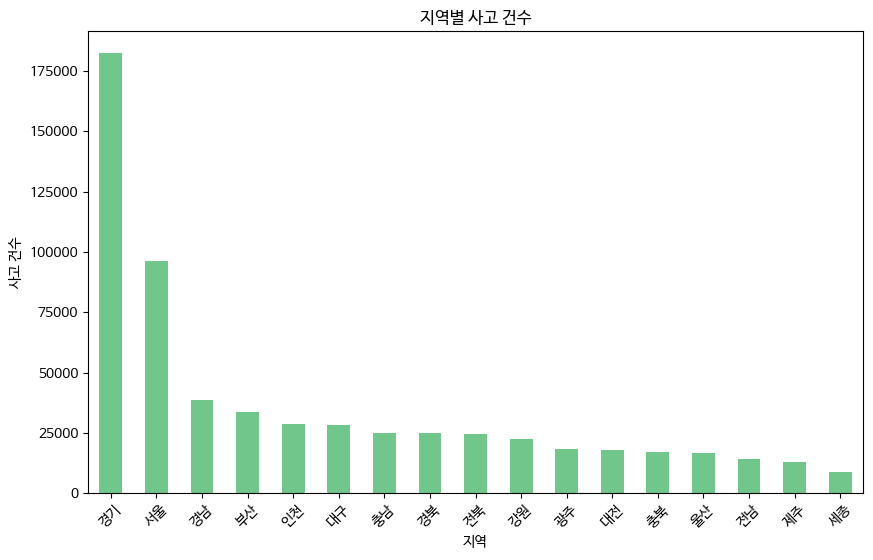

In [ ]:
region_counts = df['지역'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='#71C78B')
plt.title('지역별 사고 건수')
plt.xlabel('지역')
plt.ylabel('사고 건수')
plt.xticks(rotation=45)
plt.show()

## 연도별 사고 발생 그래프

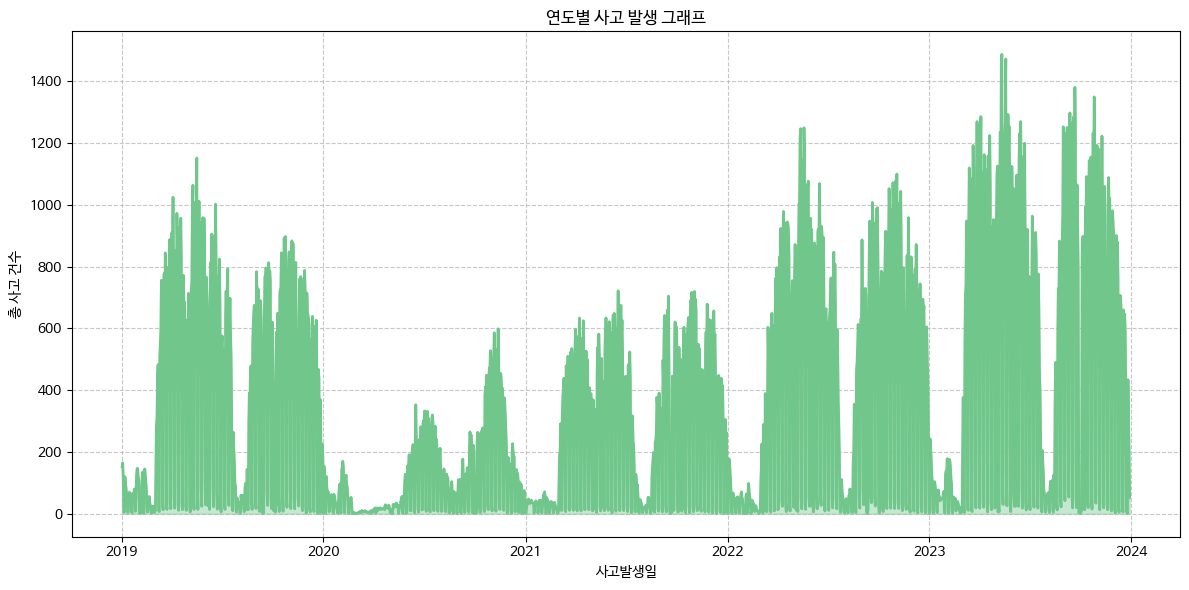

In [ ]:
# '사고발생일' 컬럼을 datetime 형식으로 변환
df['사고발생일'] = pd.to_datetime(df['사고발생일'])

# 일별 사고 건수 집계
daily_counts = df['사고발생일'].value_counts().sort_index()

# 선 스타일의 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, color='#71C78B', linewidth=2)
plt.fill_between(daily_counts.index, daily_counts.values, color='#71C78B', alpha=0.4)
plt.title('연도별 사고 발생 그래프')
plt.xlabel('사고발생일')
plt.ylabel('총 사고 건수')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 안전교육 부담 다중회귀분석

### 상관분석

In [ ]:
# 데이터 준비
data = {
    "지역": ["충북", "충남", "제주", "전북", "전남", "인천", "울산", "세종", "서울", "부산", "대전", "대구", "광주", "경북", "경남", "경기", "강원"],
    "사고건수": [4849, 6923, 3862, 6746, 3681, 8827, 5013, 2601, 30399, 10358, 4622, 8379, 5701, 7320, 12210, 60884, 5909],
    "7세-21세": [796824, 1139522, 377750, 904942, 871288, 1521322, 629550, 293052, 3832804, 1474900, 770312, 1210216, 835792, 1254966, 1789480, 7231910, 700296],
    "교원1인당 안전교육 부담": [0.06, 0.04, 0.17, 0.05, 0.05, 0.04, 0.10, 0.19, 0.01, 0.04, 0.06, 0.05, 0.07, 0.04, 0.03, 0.01, 0.06]
}

burden = pd.DataFrame(data)

# 상관 계수 계산
correlation_matrix = burden[['사고건수', '7세-21세', '교원1인당 안전교육 부담']].corr()
print("상관 계수 행렬:\n", correlation_matrix)

상관 계수 행렬:
                    사고건수    7세-21세  교원1인당 안전교육 부담
사고건수           1.000000  0.995206      -0.475097
7세-21세         0.995206  1.000000      -0.538103
교원1인당 안전교육 부담 -0.475097 -0.538103       1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


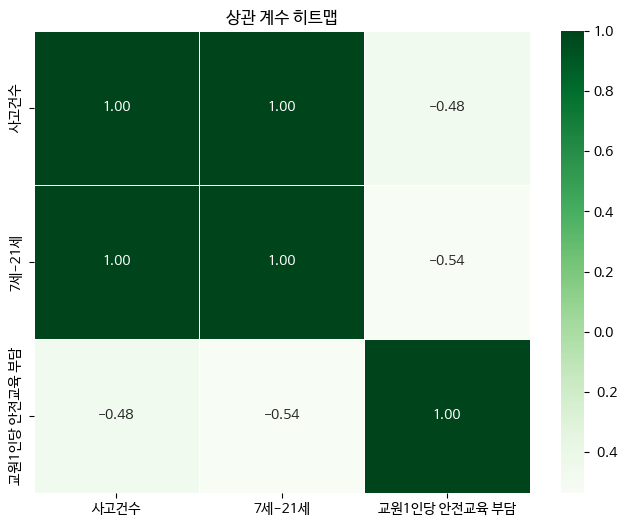

In [ ]:
# 상관 계수 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', linewidths=.5)
plt.title('상관 계수 히트맵')
plt.show()

### 다중회귀분석

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# 종속 변수와 독립 변수 설정
X = burden[['7세-21세', '교원1인당 안전교육 부담']]
y = burden['사고건수']
X = sm.add_constant(X)  # 상수항 추가

# OLS 회귀 모델 구축
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           3.33e-17
Time:                        03:27:15   Log-Likelihood:                -140.18
No. Observations:                  17   AIC:                             286.4
Df Residuals:                      14   BIC:                             288.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3870.3697    630.692     -6.137

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


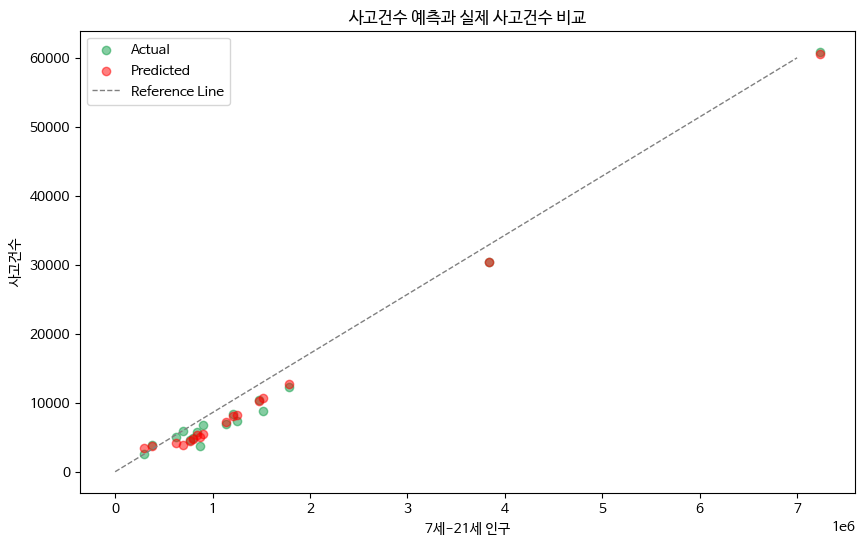

In [ ]:
# 예측값 계산
predicted_values = model.predict(X)

# 실제 값과 예측 값의 산점도로 표현
plt.figure(figsize=(10, 6))
plt.scatter(burden['7세-21세'], burden['사고건수'], color='#0C9D46', label='Actual', alpha=0.5)  # 실제 사고건수
plt.scatter(burden['7세-21세'], predicted_values, color='red', label='Predicted', alpha=0.5)  # 예측 사고건수

# (0,0)과 (7*10^6, 60000)을 지나는 회색 점선 추가
plt.plot([0, 7e6], [0, 60000], 'grey', linestyle='--', linewidth=1, label='Reference Line')

# 그래프 제목과 축 이름 설정
plt.title('사고건수 예측과 실제 사고건수 비교')
plt.xlabel('7세-21세 인구')
plt.ylabel('사고건수')
plt.legend()
plt.show()

선의 의미:

    기울기: 이 선의 기울기는 7세-21세 인구 증가에 따른 사고건수 증가율을 나타냅니다. 기울기가 급하다는 것은 인구가 증가함에 따라 사고건수가 비례하여 크게 증가함을 의미합니다.
    적합도: 선이 데이터 포인트들과 얼마나 잘 맞는지(즉, 얼마나 가까이 지나가는지)를 보여줍니다. 이는 모델이 데이터를 얼마나 잘 설명하고 예측하는지의 척도입니다.

모델 적합도 (Model Fit)

    R-squared (결정 계수): 0.996
        이 모델이 데이터 변동의 약 99.6%를 설명한다는 것을 의미합니다. 매우 높은 수치로, 모델이 데이터를 잘 설명하고 있음을 나타냅니다.
    Adj. R-squared (조정된 결정 계수): 0.995
        독립 변수의 수가 많을 때 과적합을 방지하기 위해 조정된 R-squared입니다. 이 값도 매우 높아 모델의 적합도가 우수함을 보여줍니다.
    F-statistic (F 통계량): 1575
        모델이 통계적으로 유의하다는 것을 나타내며, 관련된 p-value는 3.33e-17로 매우 낮아 모델 전체가 유의미합니다.

계수 (Coefficients)

    const (절편): -3870.3697
        절편의 t-통계량은 -6.137이며, p-value가 0.000으로 매우 작아 통계적으로 유의미합니다. 이는 모델의 절편이 0이 아님을 의미합니다.
    7세-21세: 0.0089
        이 계수는 7세-21세 인구 증가 1 단위당 사고건수가 평균적으로 0.0089만큼 증가함을 의미합니다. t-통계량은 49.349이며, p-value가 0.000으로 이 변수가 사고건수 예측에 매우 중요함을 나타냅니다.
    교원 1인당 안전교육 부담: 24,830
        이 변수의 계수는 교육 부담 지수가 1 증가할 때 사고건수가 평균적으로 24,830만큼 증가한다는 것을 나타냅니다. t-통계량은 4.032이며, p-value는 0.001로, 이 변수 역시 통계적으로 유의미합니다.

진단 통계 (Diagnostic Statistics)

    Durbin-Watson: 1.784
        이 값은 잔차들 사이의 자기상관(autocorrelation)을 진단합니다. 1.784는 자기상관이 크게 존재하지 않음을 의미합니다 (2에 가까울수록 좋음).
    Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB):
        이 값들은 잔차의 정규성을 검정합니다. 두 테스트 모두 p-value가 높아(0.719, 0.974) 잔차가 정규 분포를 따른다는 근거가 약함을 나타냅니다. 그러나 모델의 설명력이 매우 높아 이러한 문제가 큰 영향을 미치지 않을 수 있습니다.

이러한 결과는 모델이 사고건수를 예측하는 데 있어 매우 유의미하며, 주요 변수들이 사고건수에 강력한 영향을 미치고 있음을 보여줍니다. 특히 7세-21세 인구와 교원 1인당 안전교육 부담은 강력한 예측 요인으로 작용하고 있습니다.

🔴🔴다중회귀분석 결과 요약:

    모델 설명력:
        R-squared 값은 0.996으로, 모델이 데이터 변동의 거의 전체를 설명하고 있음을 나타냅니다. 이는 매우 높은 수치로, 독립변수가 종속변수인 사고건수를 매우 잘 예측하고 있음을 의미합니다.

        🔴R-squared 값(모델 설명력)은 0.996

    회귀 계수:
        7세-21세 인구에 대한 계수는 0.0089로, 이 인구가 1 증가할 때마다 사고건수는 약 0.0089만큼 증가합니다. 이 계수는 매우 유의하며(p-value < 0.000), 인구 수 증가가 사고건수 증가에 큰 영향을 끼치고 있음을 나타냅니다.
        교원 1인당 안전교육 부담에 대한 계수는 약 24,830으로, 이 지표가 1 증가할 때 사고건수는 평균적으로 24,830만큼 증가합니다. 이 변수 역시 통계적으로 유의미합니다(p-value = 0.001), 교육 부담이 높을수록 사고건수가 높아지는 것을 의미합니다.

        🔴7세-21세 인구에 대한 계수는 0.0089
        🔴이 인구가 1 증가할 때마다 사고건수는 약 0.0089만큼 증가
        🔴p-value < 0.000

        🔴교원 1인당 안전교육 부담에 대한 계수는 약 24,830
        🔴이 지표가 1 증가할 때 사고건수는 평균적으로 24,830만큼 증가
        🔴p-value = 0.001

    모델의 통계적 유의성:
        F-통계량은 1575로, 모델이 통계적으로 매우 유의미하며(p-value = 3.33e-17), 사용된 독립변수들이 사고건수를 예측하는 데 적합함을 나타냅니다.

        🔴F-통계량은 1575
        🔴p-value = 3.33e-17
        🔴독립변수들이 사고건수를 예측하는 데 적합함


그래프 분석 결과 요약:

    그래프에서 파란색 점은 실제 사고건수를, 빨간색 점은 예측된 사고건수를 나타냅니다. 그래프 상의 빨간색 점들은 파란색 점들과 거의 일치하며, 이는 회귀 모델의 예측이 실제 값과 매우 가깝다는 것을 보여줍니다.
    회색 점선(Reference Line)은 (0,0)에서 (7,000,000, 60,000)까지의 기준선을 나타내며, 일반적인 추세선으로 사용될 수 있습니다. 이 선은 표준 추세를 나타내지만 실제 데이터 포인트들은 이 선에서 약간 벗어난 위치에 있습니다.

종합적 해석:

    회귀 분석 결과와 그래프를 통해, 7세-21세 인구 수와 교원 1인당 안전교육 부담이 사고건수에 강력한 영향을 미치고 있으며, 이 모델은 실제 사고건수를 매우 정확하게 예측하고 있음을 확인할 수 있습니다. 이 정보는 정책 결정과 사고 예방 전략 수립에 유용하게 활용될 수 있습니다.

    🔴7세-21세 인구 수와 교원 1인당 안전교육 부담이 사고건수에 강력한 영향을 미친다.
    🔴이 모델은 실제 사고건수를 매우 정확하게 예측